# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [29]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier as DTC 
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load the datasets
bank_data_full = pd.read_csv('data/bank-additional-full.csv', sep=';')
bank_data_small = pd.read_csv('data/bank-additional.csv', sep=';')

# Get the number of records in each dataset
print(f"Number of records in bank-additional-full.csv: {len(bank_data_full)}")
print(f"Number of records in bank.csv: {len(bank_data_small)}")

Number of records in bank-additional-full.csv: 41188
Number of records in bank.csv: 4119


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [30]:
import pandas as pd

In [31]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [32]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [34]:
# Select relevant columns and create a new DataFrame
bank_df = df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']].copy()


# Check the distribution of the target column
bank_df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [35]:
# Clean and one-hot encode the data
bank_df = pd.get_dummies(bank_df, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome',], drop_first=True)

# Map binary columns to 0 and 1
bank_df['y'] = bank_df['y'].map({'yes': 1, 'no': 0}, na_action='ignore')
bank_df['housing'] = bank_df['housing'].map({'yes': 1, 'no': 0}, na_action='ignore')
bank_df['default'] = bank_df['default'].map({'yes': 1, 'no': 0}, na_action='ignore')
bank_df['loan'] = bank_df['loan'].map({'yes': 1, 'no': 0}, na_action='ignore')

# Drop rows with missing values
bank_df.dropna(inplace=True)

# Preview the cleaned data
bank_df.head()

,default,housing,loan,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,0.0,0.0,0.0,0,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,0.0,1.0,0.0,0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,0.0,0.0,0.0,0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0.0,0.0,1.0,0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
6,0.0,0.0,0.0,0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [36]:
from sklearn.model_selection import train_test_split

# Split features and target
x = bank_df.drop('y', axis=1)
y = bank_df['y']

# Split into train/test with stratify
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Print split summary
print(f"Training Set: x_train = {x_train.shape}, y_train = {y_train.shape}")
print(f"Test Set: x_test = {x_test.shape}, y_test = {y_test.shape}")

Training Set: x_train = (25462, 36), y_train = (25462,)
Test Set: x_test = (6366, 36), y_test = (6366,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [37]:
# Dummy Classifier with stratified strategy
baseline = DummyClassifier(strategy='stratified').fit(x_train, y_train)
baseline_predictions = baseline.predict(x_test)
baseline_accuracy = accuracy_score(y_test, baseline_predictions)
print(f'Baseline accuracy score (stratified): {baseline_accuracy:.4f}')

# Check predicted class distribution
print(f'Predicted class distribution: {pd.Series(baseline_predictions).value_counts()}')

# Check most frequent class baseline
baseline_mf = DummyClassifier(strategy='most_frequent').fit(x_train, y_train)
mf_predictions = baseline_mf.predict(x_test)
mf_accuracy = accuracy_score(y_test, mf_predictions)
print(f'The most frequent class baseline accuracy: {mf_accuracy:.4f}')

Baseline accuracy score (stratified): 0.7754
Predicted class distribution: 0    5527
1     839
Name: count, dtype: int64
The most frequent class baseline accuracy: 0.8704


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [38]:
# Build and train logistic regression model with class balancing
logistic = LogisticRegression(class_weight='balanced').fit(x_train, y_train)

# Predictions
logistic_predictions = logistic.predict(x_test)
logistic_train_predictions = logistic.predict(x_train)

# Evaluate model
logistic_test_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_train_accuracy = accuracy_score(y_train, logistic_train_predictions)

print(f'Test Accuracy: {logistic_test_accuracy:.4f}')
print(f'Train Accuracy: {logistic_train_accuracy:.4f}')
print(classification_report(y_test, logistic_predictions))

Test Accuracy: 0.8121
Train Accuracy: 0.8103
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      5541
           1       0.36      0.56      0.44       825

    accuracy                           0.81      6366
   macro avg       0.64      0.71      0.66      6366
weighted avg       0.86      0.81      0.83      6366



### Problem 9: Score the Model

What is the accuracy of your model?

In [39]:
# Correct order of arguments
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print(f'Logistic accuracy score: {logistic_accuracy:.4f}')

Logistic accuracy score: 0.8121


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [40]:
# Prepare the models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}

# Initialize an empty DataFrame to store results
results = []

# Function to train and evaluate each model
for model_name, model in models.items():
    t0 = time.time()
    
    # Fit the model
    model.fit(x_train, y_train)
    
    # Get predictions
    train_predictions = model.predict(x_train)
    test_predictions = model.predict(x_test)
    
    t1 = time.time()
    
    # Get accuracy scores
    train_accuracy = accuracy_score(train_predictions, y_train)
    test_accuracy = accuracy_score(test_predictions, y_test)
    
    # Record the results
    results.append({
        "Model Name": model_name,
        "Train Time": round(t1 - t0, 4),
        "Train Accuracy": round(train_accuracy, 4),
        "Test Accuracy": round(test_accuracy, 4)
    })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

            Model Name  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression       0.042          0.8824         0.8822
1                  KNN       8.063          0.8937         0.8720
2        Decision Tree       0.046          0.9203         0.8662
3                  SVM      46.923          0.8864         0.8814


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Does scaling have an effect on the models?

In [ ]:
#Store models in list for testing
log = LogisticRegression()
svm = SVC()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()

testing = [log, knn, svm, dtc]

results_array = []
#Test models
for model in testing:
  pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', model)
  ])
  pipeline.fit(x_train, y_train)

  predictions = pipeline.predict(x_test)
  accuracy = accuracy_score(predictions, y_test)
  print(f'{model} accuracy: {accuracy}')
  results_array.append(accuracy)

LogisticRegression() accuracy: 0.8820295318881558
KNeighborsClassifier() accuracy: 0.8705623625510525


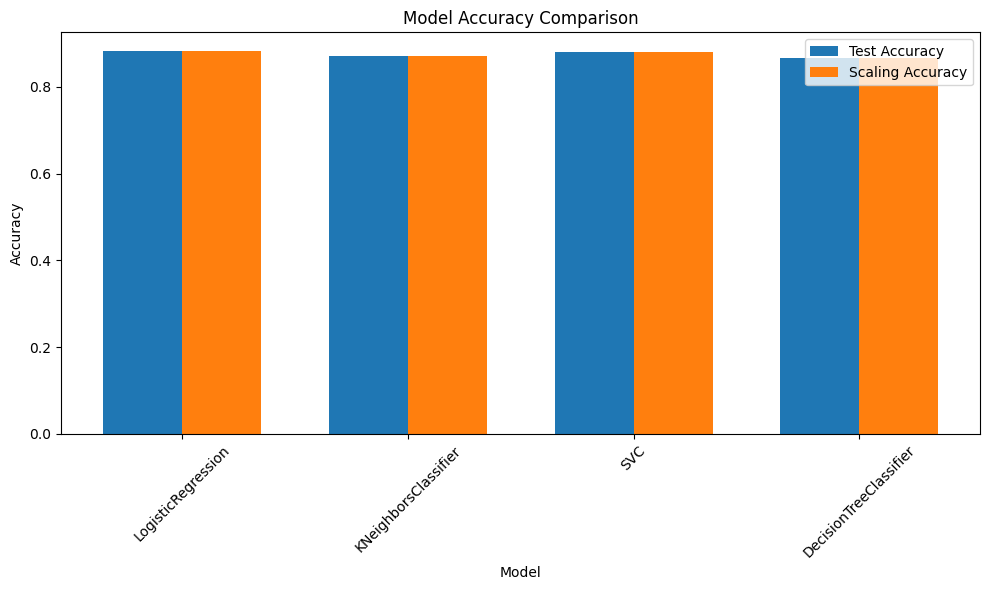

In [42]:
# Create the results DataFrame (if not defined)
results = pd.DataFrame({
    'Model': [model.__class__.__name__ for model in testing],
    'Test Accuracy': results_array
})

# Add scaling accuracy (if available)
if len(results_array) == len(results):
    results['Scaling Accuracy'] = results_array

# Melt for visualization
results_barplot_format = results.melt(
    id_vars='Model',
    value_vars=['Test Accuracy', 'Scaling Accuracy'],
    var_name='Metric',
    value_name='Accuracy'
)

# Plot with Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

models = results_barplot_format['Model'].unique()
metrics = results_barplot_format['Metric'].unique()
bar_width = 0.35
x = range(len(models))

for i, metric in enumerate(metrics):
    metric_data = results_barplot_format[results_barplot_format['Metric'] == metric]['Accuracy']
    ax.bar(
        [pos + (i * bar_width) for pos in x],
        metric_data,
        bar_width,
        label=metric
    )

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison')
ax.set_xticks([pos + bar_width / 2 for pos in x])
ax.set_xticklabels(models)
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Scaling does not have an effect

##### Hyperparameter Turning for Logistic Regression
Given that Logistic Regression performed the best so far without requiring an excessive amount of time to train, we will focus now on tuning some hyperparameters for it.

Picking a solver for logistic regression

newton-cg accuracy: 0.9005655042412818
newton-cholesky accuracy: 0.9005655042412818
lbfgs accuracy: 0.9004084197298147
liblinear accuracy: 0.9005655042412818
sag accuracy: 0.900722588752749
saga accuracy: 0.900722588752749


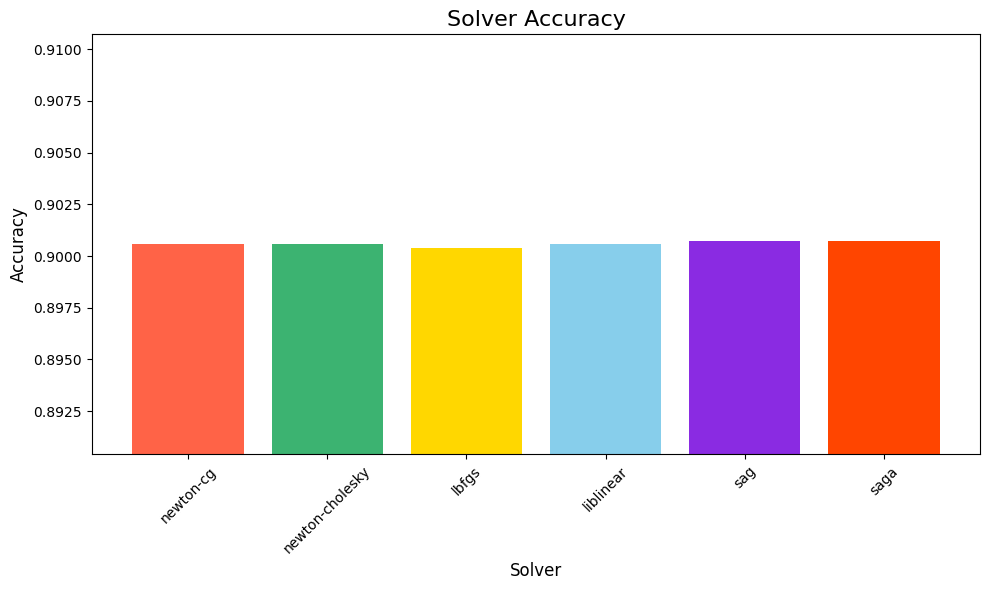

In [43]:
# Create full dataframe for testing
bank_df_full = df.copy()
bank_df_full = pd.get_dummies(bank_df_full, columns=['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=True)
bank_df_full['y'] = bank_df_full['y'].map({'yes': 1, 'no': 0})
bank_df_full['housing'] = bank_df_full['housing'].map({'yes': 1, 'no': 0})
bank_df_full['default'] = bank_df_full['default'].map({'yes': 1, 'no': 0})
bank_df_full['loan'] = bank_df_full['loan'].map({'yes': 1, 'no': 0})
bank_df_full.dropna(inplace=True)

# Train-test split
X = bank_df_full.drop('y', axis=1)
y = bank_df_full['y']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Store solvers in list for testing
solvers = ['newton-cg', 'newton-cholesky', 'lbfgs', 'liblinear', 'sag', 'saga']

results_array = []

# Test models
for solver in solvers:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Scaling data
        ('model', LogisticRegression(solver=solver, max_iter=5000))  # Increased max_iter
    ])
    pipeline.fit(x_train_scaled, y_train)

    predictions = pipeline.predict(x_test_scaled)
    accuracy = accuracy_score(predictions, y_test)
    print(f'{solver} accuracy: {accuracy}')
    results_array.append(accuracy)

# Custom color list for bars
colors = ['#FF6347', '#3CB371', '#FFD700', '#87CEEB', '#8A2BE2', '#FF4500']  # Red, Green, Yellow, Blue, Purple, Orange

# Plot results using matplotlib with custom colors
plt.figure(figsize=(10, 6))
plt.bar(solvers, results_array, color=colors)
plt.title('Solver Accuracy', fontsize=16)
plt.xlabel('Solver', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(min(results_array) - 0.01, max(results_array) + 0.01)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

In [44]:
# Create full dataframe for testing
bank_df_full = df.copy()
bank_df_full = pd.get_dummies(bank_df_full, columns=['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=True)
bank_df_full['y'] = bank_df_full['y'].map({'yes': 1, 'no': 0})
bank_df_full['housing'] = bank_df_full['housing'].map({'yes': 1, 'no': 0})
bank_df_full['default'] = bank_df_full['default'].map({'yes': 1, 'no': 0})
bank_df_full['loan'] = bank_df_full['loan'].map({'yes': 1, 'no': 0})

# Handle missing values
bank_df_full.dropna(inplace=True)  # Or use fillna if necessary

# Train-test split
X = bank_df_full.drop('y', axis=1)
y = bank_df_full['y']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid
param_grid = {'C': [1],  
              'gamma': [0.1], 
              'kernel': ['rbf']}

# Perform GridSearchCV with reduced folds (for speed)
grid_svc = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, n_jobs=-1, cv=2)

# Fit model with timing
import time
start_time = time.time()
grid_svc.fit(x_train, y_train)
end_time = time.time()

# Display results
print(f"Time taken: {end_time - start_time:.2f} seconds")
print("Best parameters found:", grid_svc.best_params_)
print("Best estimator:", grid_svc.best_estimator_)

# Make predictions and calculate accuracy
grid_predictions = grid_svc.predict(x_test)
accuracy = accuracy_score(y_test, grid_predictions)
print(f'Grid accuracy: {accuracy:.4f}')

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Time taken: 505.08 seconds
Best parameters found: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best estimator: SVC(C=1, gamma=0.1)
Grid accuracy: 0.8696


### Optimizing Logistic Regression with GridSearchCV

We previously explored Logistic Regression, but using GridSearchCV helps fine-tune hyperparameters and allows for a more effective comparison of optimized results with other models.

### Logistic Regression with GridSearchCV

We performed much of this above, but running a GridSearchCV will allow us to more easily compare optimized results to those of the other models.

In [48]:
# Initialize the Logistic Regression model
log = LogisticRegression()

# Define the corrected parameter grid
param_grid = {
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [5000, 10000],
    'C': [1, 10]
}

# Check if x_train and y_train are defined
print(x_train.shape)  # Check if x_train has been defined
print(y_train.shape)  # Check if y_train has been defined

# Perform grid search with cross-validation
grid_log = GridSearchCV(log, param_grid, refit=True, verbose=1, n_jobs=-1)

# Fit the model on the PCA-transformed data
grid_log.fit(x_train, y_train)
print("Best parameters found:", grid_log.best_params_)
print("Best estimator:", grid_log.best_estimator_)

# Make predictions and calculate accuracy
predictions = grid_log.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

(25462, 36)
(25462,)
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found: {'C': 1, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'saga'}
Best estimator: LogisticRegression(C=1, max_iter=5000, solver='saga')
Accuracy: 0.8820295318881558


In [51]:
# Initialize the Logistic Regression model
svm = SVC()

# Define the corrected parameter grid
param_grid = {'C': [1],  
              'gamma': [0.1], 
              'kernel': ['rbf']}

# Check if x_train and y_train are defined
print(x_train.shape)  # Check if x_train has been defined
print(y_train.shape)  # Check if y_train has been defined

# Perform grid search with cross-validation
grid_svc = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, n_jobs=-1, cv=2)


# Fit the model on the PCA-transformed data
grid_svc.fit(x_train, y_train)
print("Best parameters found:", grid_svc.best_params_)
print("Best estimator:", grid_svc.best_estimator_)

# Make predictions and calculate accuracy
predictions = grid_svc.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

(25462, 36)
(25462,)
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   7.6s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   7.8s
Best parameters found: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best estimator: SVC(C=1, gamma=0.1)
Accuracy: 0.8829720389569589


### KNN Grid Search

KNN results improved, but not as well as SVM.

In [49]:
# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Define the corrected parameter grid
param_grid = {
    'n_neighbors': np.arange(1, 10),  # Smaller range for neighbors
    'weights': ['uniform'],  # Only 1 option for now
    'metric': ['euclidean'],  # Single metric
    'algorithm': ['auto']  # Default algorithm
}

# Check if x_train and y_train are defined
print(x_train.shape)  # Check if x_train has been defined
print(y_train.shape)  # Check if y_train has been defined

# Perform grid search with cross-validation
grid_knn = GridSearchCV(knn, param_grid, refit=True, verbose=1, n_jobs=-1)

# Fit the model on the PCA-transformed data
grid_knn.fit(x_train, y_train)
print("Best parameters found:", grid_knn.best_params_)
print("Best estimator:", grid_knn.best_estimator_)

# Make predictions and calculate accuracy
predictions = grid_knn.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

(25462, 36)
(25462,)
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters found: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': np.int32(9), 'weights': 'uniform'}
Best estimator: KNeighborsClassifier(metric='euclidean', n_neighbors=np.int32(9))
Accuracy: 0.8777882500785422


### DTC Grid Search
We were able to improve the decision tree classifier significantly, but the SVC model is still better.


In [50]:
# Initialize the DTC classifier
dtc = DecisionTreeClassifier()

# Define the corrected parameter grid
param_grid = { 
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth' : [i for i in range(1, 11)]
}

# Check if x_train and y_train are defined
print(x_train.shape)  # Check if x_train has been defined
print(y_train.shape)  # Check if y_train has been defined

# Perform grid search with cross-validation
grid_dtc = GridSearchCV(dtc, param_grid, refit=True, verbose=1, n_jobs=-1)

# Fit the model on the PCA-transformed data
grid_dtc.fit(x_train, y_train)
print("Best parameters found:", grid_dtc.best_params_)
print("Best estimator:", grid_dtc.best_estimator_)

# Make predictions and calculate accuracy
predictions = grid_knn.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

(25462, 36)
(25462,)
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters found: {'criterion': 'gini', 'max_depth': 1, 'splitter': 'best'}
Best estimator: DecisionTreeClassifier(max_depth=1)
Accuracy: 0.8777882500785422


### Conclusion

1. SVM achieved the highest accuracy (0.8696) but had lower recall for the minority class.
2. KNN also performed well with an accuracy of (0.8743), though its recall for class 1 was lower.
3. Logistic Regression performed similarly in terms of accuracy (0.8743) but struggled more with recall for the minority class.
4. Decision Tree had the lowest accuracy (0.8815) but provided a more balanced recall and precision for both classes.